In [3]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [4]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [68]:
# colours = ['#ebe831', '#ffac32', '#ff7259', '#e14a7c', '#9e4091', '#433f8c']
colours = ['#003f5c','#7a5195' ,'#ef5675', '#ffa600']
leg_labels = ['10$^1$K', '10$^2$K', '10$^3$K', '10$^4$K', '10$^5$K', '10$^6$K']
lss = [':', '-', '--', '-.']
files_ALIM = glob.glob('*ACS.dat')
files_eq_ahfd = glob.glob('*CA_eq_time_AHFD.dat')
files_eq_khfd = glob.glob('*CA_eq_time_KHFD.dat')

ann_data = {}
ahfd_data = {}
khfd_data = {}

for file in files_ALIM:
    ann_data[file.replace('ACS.dat', '')] = pd.read_csv(file, sep="\t", header = None)
for file in files_eq_ahfd:
    ahfd_data[file.replace('CA_eq_time_AHFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)
for file in files_eq_khfd:
    khfd_data[file.replace('CA_eq_time_AHFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)

In [69]:
def ann_limits_plots():
    fig, ax = plt.subplots(figsize = (8,6), ncols=3, nrows =3, sharey = 'row', sharex = True, dpi = 200)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(ann_data['d'+str(i)].columns))[1:]:
                col.loglog(ann_data['d'+str(i)][0], ann_data['d'+str(i)][j], colours[j-1], label = leg_labels[j-1])

            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T_\star$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('ann_fdsup.pdf')

In [70]:
def som_plots():
    
    fig, ax = plt.subplots(figsize = (6,3), nrows = 2, ncols = 2, sharey = 'row', sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    
    for j in range(len(ann_data['d4'].columns))[1:]:
        ax[0,0].loglog(ann_data['d4'][0], ann_data['d4'][j], colours[j-1], label = leg_labels[j-1])
    ax[0,0].set_xlabel('$m_\chi$ [GeV]')
    ax[0,0].set_ylabel('$\Lambda$ [GeV]')
    ax[0,0].legend(loc = (2,-0.5), shadow = False).set_title(title = '$T_\star$ [K]', prop={"size": 5})
    ax[0,0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[0,0].text(0.08, 0.9, 'D4', ha='center', va='center', transform=ax[0,0].transAxes)
    
    for j in range(len(ann_data['d8'].columns))[1:]:
        ax[0,1].loglog(ann_data['d8'][0], ann_data['d8'][j], colours[j-1], label = leg_labels[j-1])
    ax[0,1].set_xlabel('$m_\chi$ [GeV]')
    ax[0,1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[0,1].text(0.08, 0.9, 'D8', ha='center', va='center', transform=ax[0,1].transAxes)
    
    for j in range(len(ann_data['d6'].columns))[1:]:
        ax[1,0].loglog(ann_data['d6'][0], ann_data['d6'][j], colours[j-1], label = leg_labels[j-1])
    ax[1,0].set_xlabel('$m_\chi$ [GeV]')
    ax[1,0].set_xlim(10**(-4.8), 1e5)
    ax[1,0].set_ylabel('$\Lambda$ [GeV]')
    ax[1,0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[1,0].text(0.08, 0.9, 'D6', ha='center', va='center', transform=ax[1,0].transAxes)
    
    for j in range(len(ann_data['d5'].columns))[1:]:
        ax[1,1].loglog(ann_data['d5'][0], ann_data['d5'][j], colours[j-1], label = leg_labels[j-1])
    ax[1,1].set_xlabel('$m_\chi$ [GeV]')
    ax[1,1].set_xlim(10**(-4.8), 1e5)
    ax[1,1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[1,1].text(0.08, 0.9, 'D5', ha='center', va='center', transform=ax[1,1].transAxes)
    
    plt.savefig('ann_lam.pdf')
    

In [79]:
def CA_eq_times_plots():
    
    labs = ['$T^\\infty_\\text{ann}=100 K$', '$T^\\infty_\\text{ann}=1000 K$', '$T^\\infty_\\text{ann}=1880 K$', '$T^\\infty_\\text{ann}=2440 K$']
    fig, ax = plt.subplots(figsize = (6,9), ncols=2, nrows =5, sharey = 'row', sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(ahfd_data['d'+str(i)].columns))[2:]:
                col.loglog(ahfd_data['d'+str(i)][0], ahfd_data['d'+str(i)][j], color = colours[j-1], label = labs[j-1], linestyle = lss[j-1])
    

            col.text(0.92, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(1e-5, 1e5)
#             col.legend(loc = 'lower right', shadow = False).set_title(title = 'T [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            col.set_xlim(10**-4.8, 10**5)
            if n ==0:
                col.set_ylabel('$\\tau_\\text{eq}$ [yrs]')
            if n == 1:
                col.legend(loc = (1, 0.5), shadow = False)#.set_title(title = '$T^\\infty_\\text{ann}$ [K]', prop={"size": 8})
            i+=1
    plt.savefig('ahfd_plots.pdf')

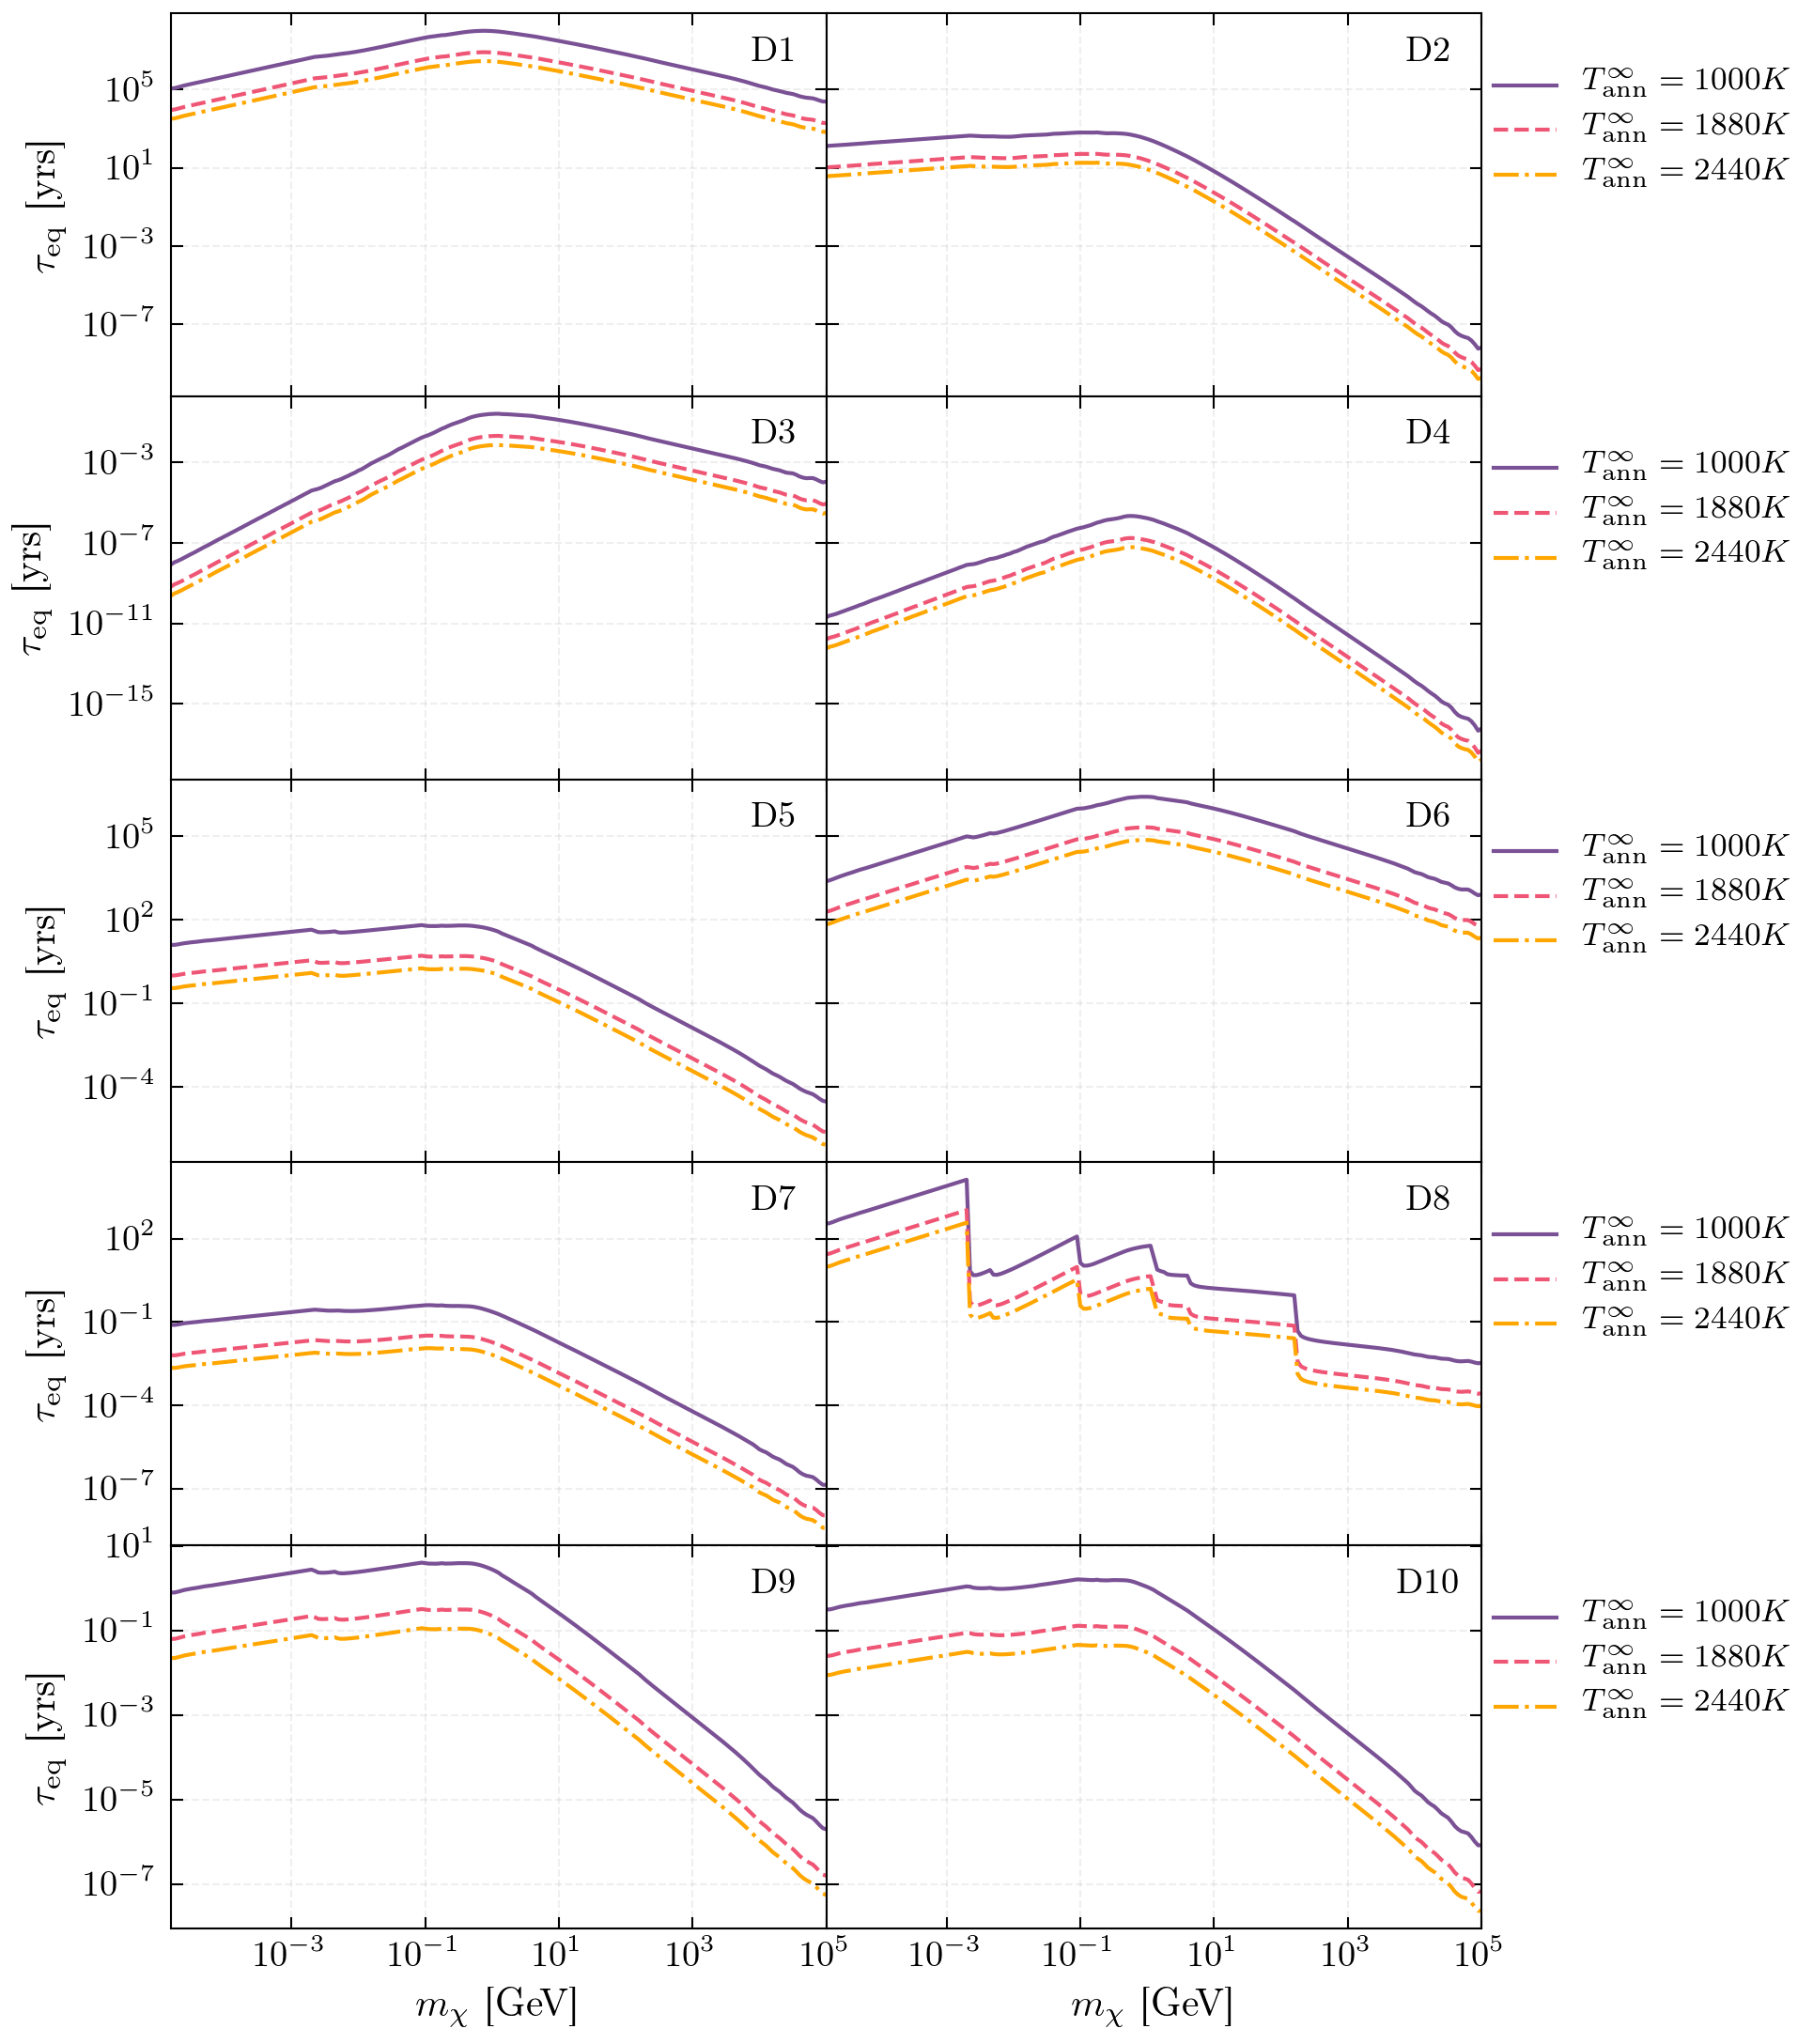

In [80]:
CA_eq_times_plots()

In [57]:
def fd_comp_plots():
    files = glob.glob('*sup.dat')
    
    comp_data = {}
    
    i = 0
    names = ['sup', 'nosup']
    for file in files:
        comp_data[names[i]] = pd.read_csv(file, sep="\t", header = None)
        i+=1
        
    fig, ax = plt.subplots(2,1, figsize = (5,4), sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0)
    
    for j in range(len(ann_data['d'+str(i)].columns))[1:]:
        ax[1].loglog(comp_data['nosup'][0], comp_data['nosup'][j], colours[j-1], label = leg_labels[j-1])
        ax[1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
        ax[1].axvline(5e-4, color = 'black', alpha = 0.3, linestyle = '--')
        ax[1].axvline(2e-3, color = 'black', alpha = 0.3, linestyle = '--')
        ax[1].set_xlabel('$m_\chi$ [GeV]')
        ax[1].set_ylabel('$\\Lambda$ [GeV]')
        ax[1].legend(loc = (1,0.8), shadow = False).set_title(title = '$T_\star$ [K]', prop={"size": 6})
        ax[1].set_xlim(10**-4.8, 10**5)
        
#         ax[1].set_xlim(10**-4.8, 10**-2)
        
    for j in range(len(ann_data['d'+str(i)].columns))[1:]:
        ax[0].loglog(comp_data['sup'][0], comp_data['sup'][j], colours[j-1], label = leg_labels[j-1])
        ax[0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
        ax[0].axvline(5e-4, color = 'black', alpha = 0.3, linestyle = '--')
        ax[0].axvline(2e-3, color = 'black', alpha = 0.3, linestyle = '--')
        ax[0].set_xlabel('$m_\chi$ [GeV]')
        ax[0].set_ylabel('$\\Lambda$ [GeV]')
#         ax[0].set_xlim(10**-4.8, 10**-2)

    plt.savefig('fd_comp.pdf')

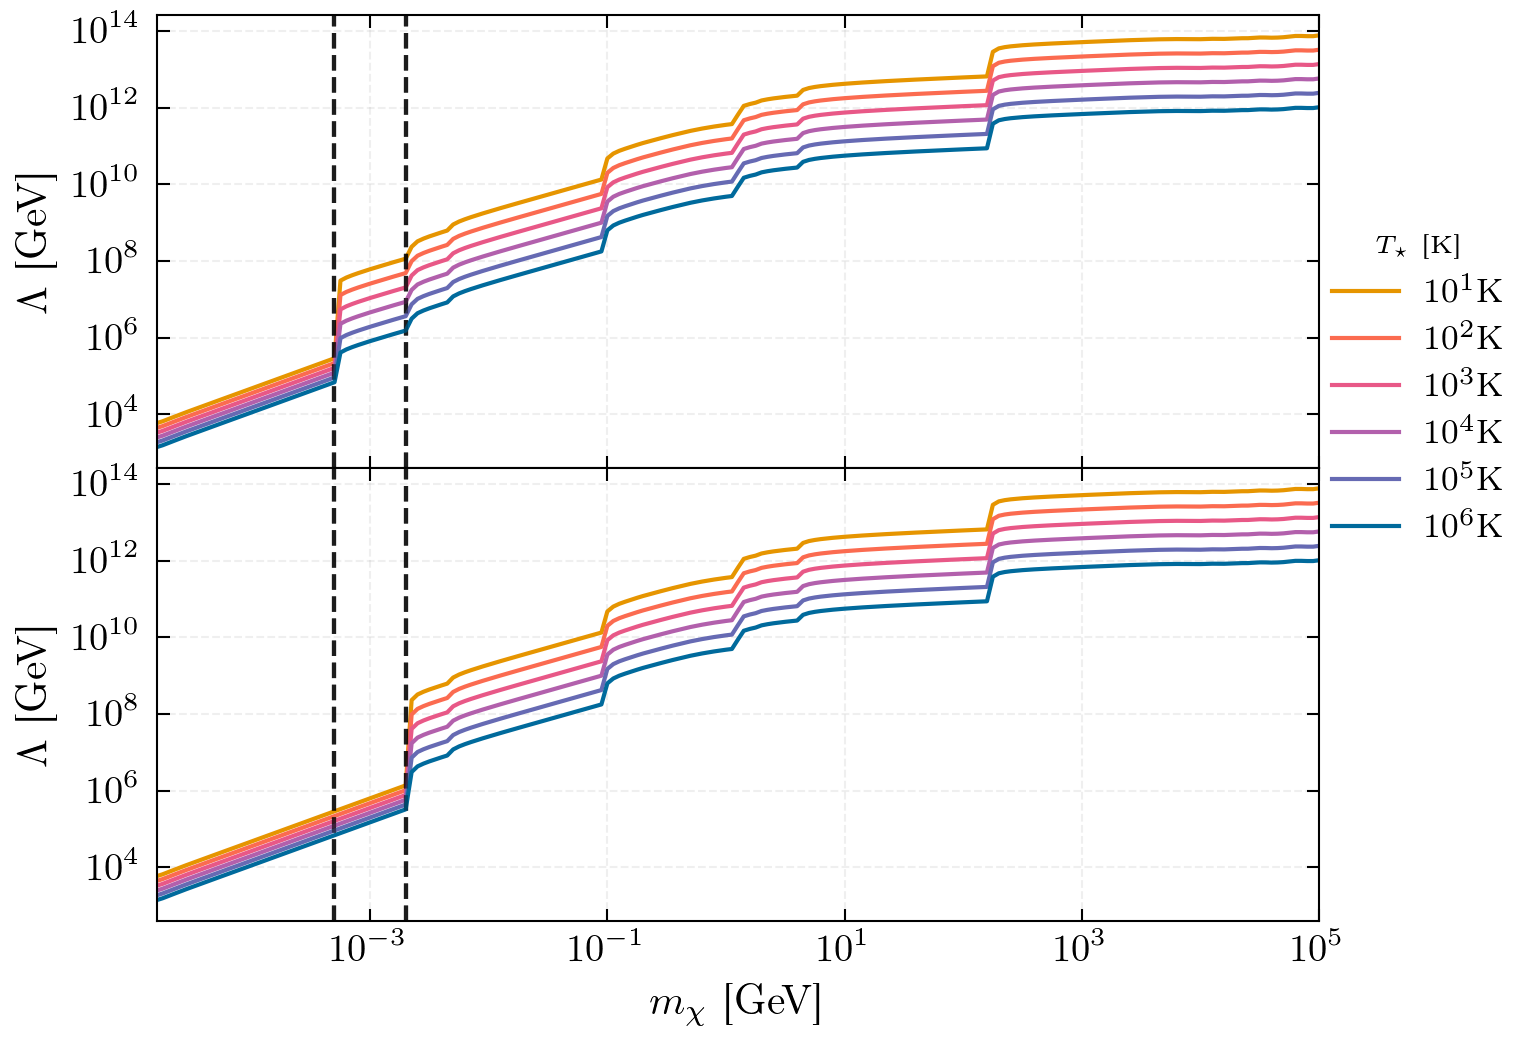

In [42]:
fd_comp_plots()